In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

# Display entire Scenario string in notebook
pd.options.display.max_colwidth = 4000

In [2]:
# Read data from Excel
columns_from_excel = "F,KC,KD,KE,KU,LE"
column_headers = ["scenarios", "cash_delta", "finance_delta", "lease_delta", "spend_delta", "lift_delta"]

df = pd.read_excel(r'C:\Users\bryant.vu\Documents\Python_Scripts\2019.11.04 - DSS - v4.7.2 - 7 block - Mitsu MY19 v4.xlsm', sheet_name="Calc", names=column_headers, skiprows=499, nrows=500, usecols=columns_from_excel)

In [3]:
# Remove (#) and spaces at beginning and end of Scenario
df['scenarios'] = df['scenarios'].str.replace('\\(.\\)','', regex=True).str.lstrip().str.rstrip()

In [4]:
# Create delta_spend columns in data
# Note: need to add user input baseline (currently controlled in if index % 500 == x)
delta_columns = ["cash_delta", "finance_delta", "lease_delta","spend_delta","lift_delta"]
for x in delta_columns:
    baseline = 0
    df_delta = []
    if x == 'lift_delta':
        for index, row in df.iterrows():
            if index % 500 == 11:
                baseline = row[x]
            try:
                delta = row[x]/baseline - 1
                df_delta.append(delta)
            except:
                delta = row[x] - baseline
                df_delta.append(delta)
    else:
        for index, row in df.iterrows():
            if index % 500 == 11:
                baseline = row[x]
            delta = row[x] - baseline
            df_delta.append(delta)
    df[x] = df_delta

# Create no_of_moves column
no_of_moves = 0
df_no_of_moves = []

for index, row in df.iterrows():
    no_of_moves = str(row['scenarios']).count('\n') + 1
    df_no_of_moves.append(no_of_moves)
    
df['no_of_moves'] = df_no_of_moves

In [5]:
# Find efficiency frontier (only model #1 so far)
df_length = df.shape[0]
eff_frontier = pd.DataFrame()

for i in range(0,500,500):
    for k in range(13,500):
        current_spend = df['spend_delta'][k + i]
        current_lift = df['lift_delta'][k + i]
        for j in range(13,500):
            new_spend = df['spend_delta'][j + i]
            new_lift = df['lift_delta'][j + i]
            if (new_spend < current_spend) & (new_lift > current_lift):
                break
            elif (np.isnan(df['spend_delta'][j + i])) & (j == 499):
                if np.isnan(df['spend_delta'][k + i]):
                    continue
                else:
                    eff_frontier = eff_frontier.append(df.iloc[[k+i]])

# Drop N/As
eff_frontier = eff_frontier.dropna()

In [6]:
# Set spend boundaries
eff_frontier = eff_frontier[(eff_frontier['spend_delta'] > -200)]
eff_frontier = eff_frontier[(eff_frontier['spend_delta'] < 600)]

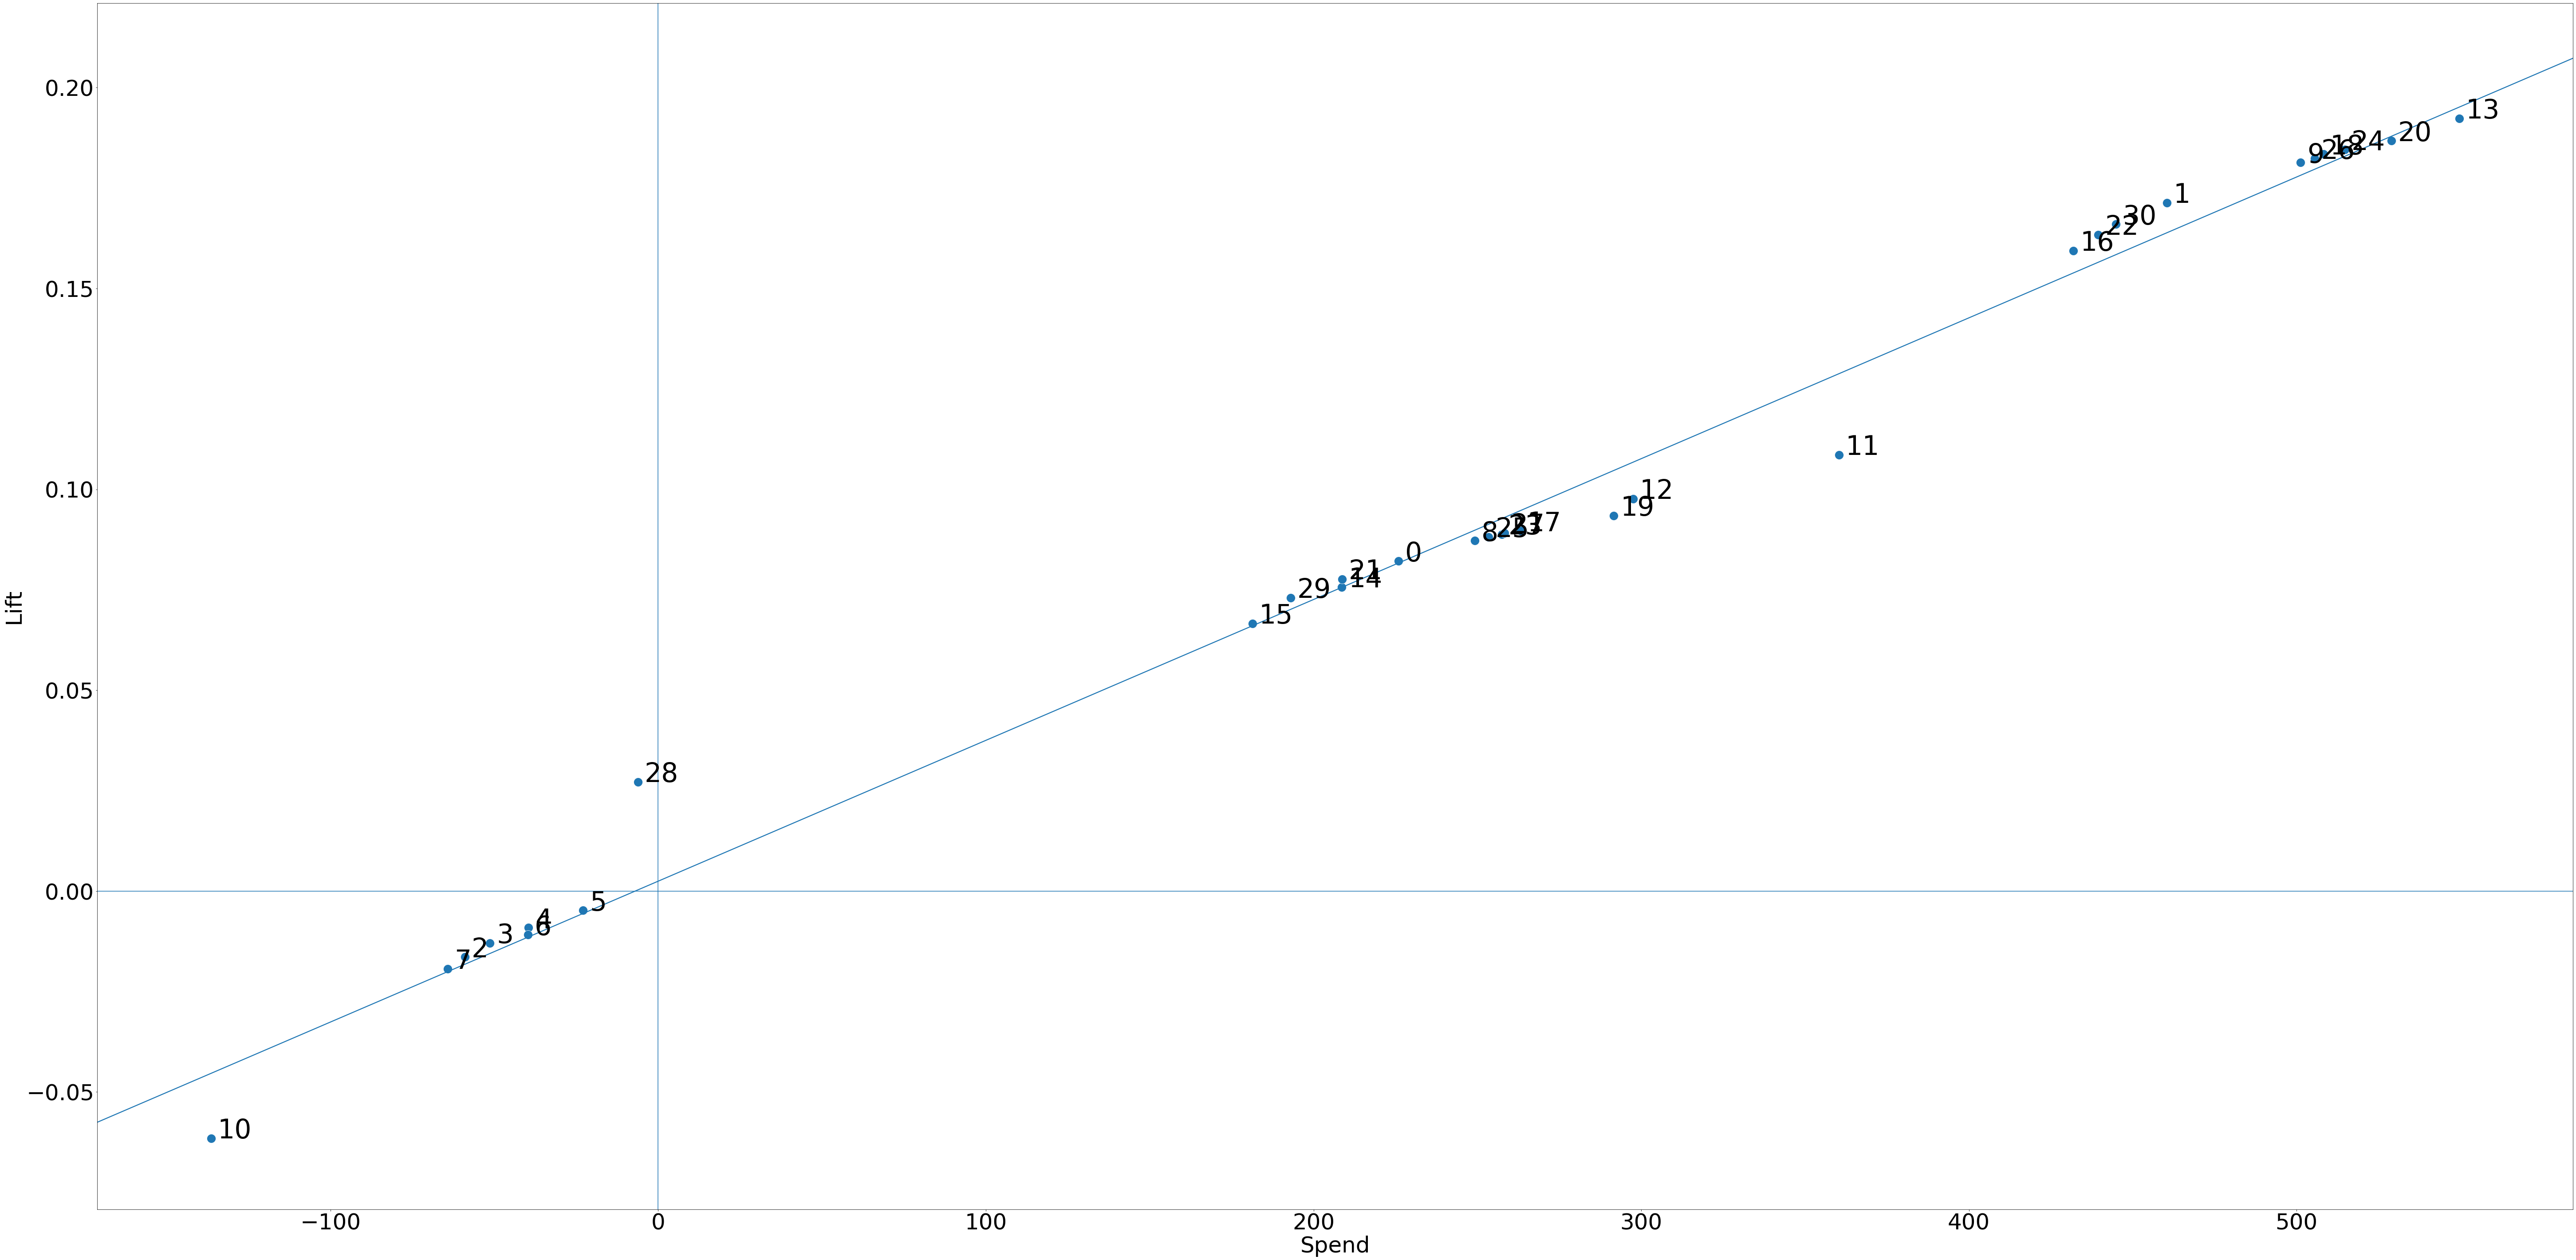

In [8]:
# Plot efficiency frontier 
fig, ax = plt.subplots()
p1 = sns.scatterplot(x=eff_frontier['spend_delta'], y=eff_frontier['lift_delta'], s=400)
p2 = sns.regplot(x=eff_frontier['spend_delta'], y=eff_frontier['lift_delta'], ci=0)

ax.axhline(y=0)
ax.axvline(x=0)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('Spend', fontsize=50)
plt.ylabel('Lift', fontsize=50)
plt.rcParams["figure.figsize"] = (100,50)

# Label data points
for i in range(eff_frontier.shape[0]):
    p1.text(eff_frontier['spend_delta'].iloc[i]+2, eff_frontier['lift_delta'].iloc[i], i, size=60)

In [8]:
eff_frontier.sort_values('spend_delta')
eff_frontier['row_no'] = [i for i in range(eff_frontier.shape[0])]

eff_frontier

,scenarios,cash_delta,finance_delta,lease_delta,spend_delta,lift_delta,no_of_moves,row_no
17,"+$250 CC,",2.500000e+02,-0.002645,0.0,225.897763,0.082142,1,0
18,"+$500 CC,",5.000000e+02,-0.006294,0.0,460.420946,0.171313,1,1
21,"-$1,000 APR,",4.547474e-13,-1000.018296,0.0,-58.992556,-0.016439,1,2
22,"-$750 APR,",0.000000e+00,-750.012642,0.0,-51.343717,-0.012955,1,3
23,"-$500 APR,",-4.547474e-13,-500.007621,0.0,-39.617788,-0.009109,1,4
24,"-$250 APR,",0.000000e+00,-250.003359,0.0,-22.889019,-0.004823,1,5
31,"2.9%/3.9%/4.9%,",-4.547474e-13,-341.596097,0.0,-39.691772,-0.010903,1,6
32,"3.9%/4.9%/std,",4.547474e-13,-492.445544,0.0,-64.245377,-0.019368,1,7
43,"+$250 CC, \n+$250 APR,",2.500000e+02,250.000648,0.0,249.183002,0.087208,2,8
44,"+$500 CC, \n+$500 APR,",5.000000e+02,500.001092,0.0,501.226678,0.181333,2,9


In [9]:
# Find best fit line
xs = p1.get_lines()[0].get_xdata()
ys = p1.get_lines()[0].get_ydata()

xs_delta = xs - xs.mean()
ys_delta = ys - ys.mean()
xs_times_ys = xs_delta * ys_delta
xs_squared = xs_delta * xs_delta

m = xs_times_ys.sum() / xs_squared.sum()
b = ys.mean() - m*xs.mean()

eff_frontier['y_line'] = eff_frontier['spend_delta']*m+b
eff_frontier = eff_frontier[eff_frontier['lift_delta'] > eff_frontier['y_line']-0.01002]

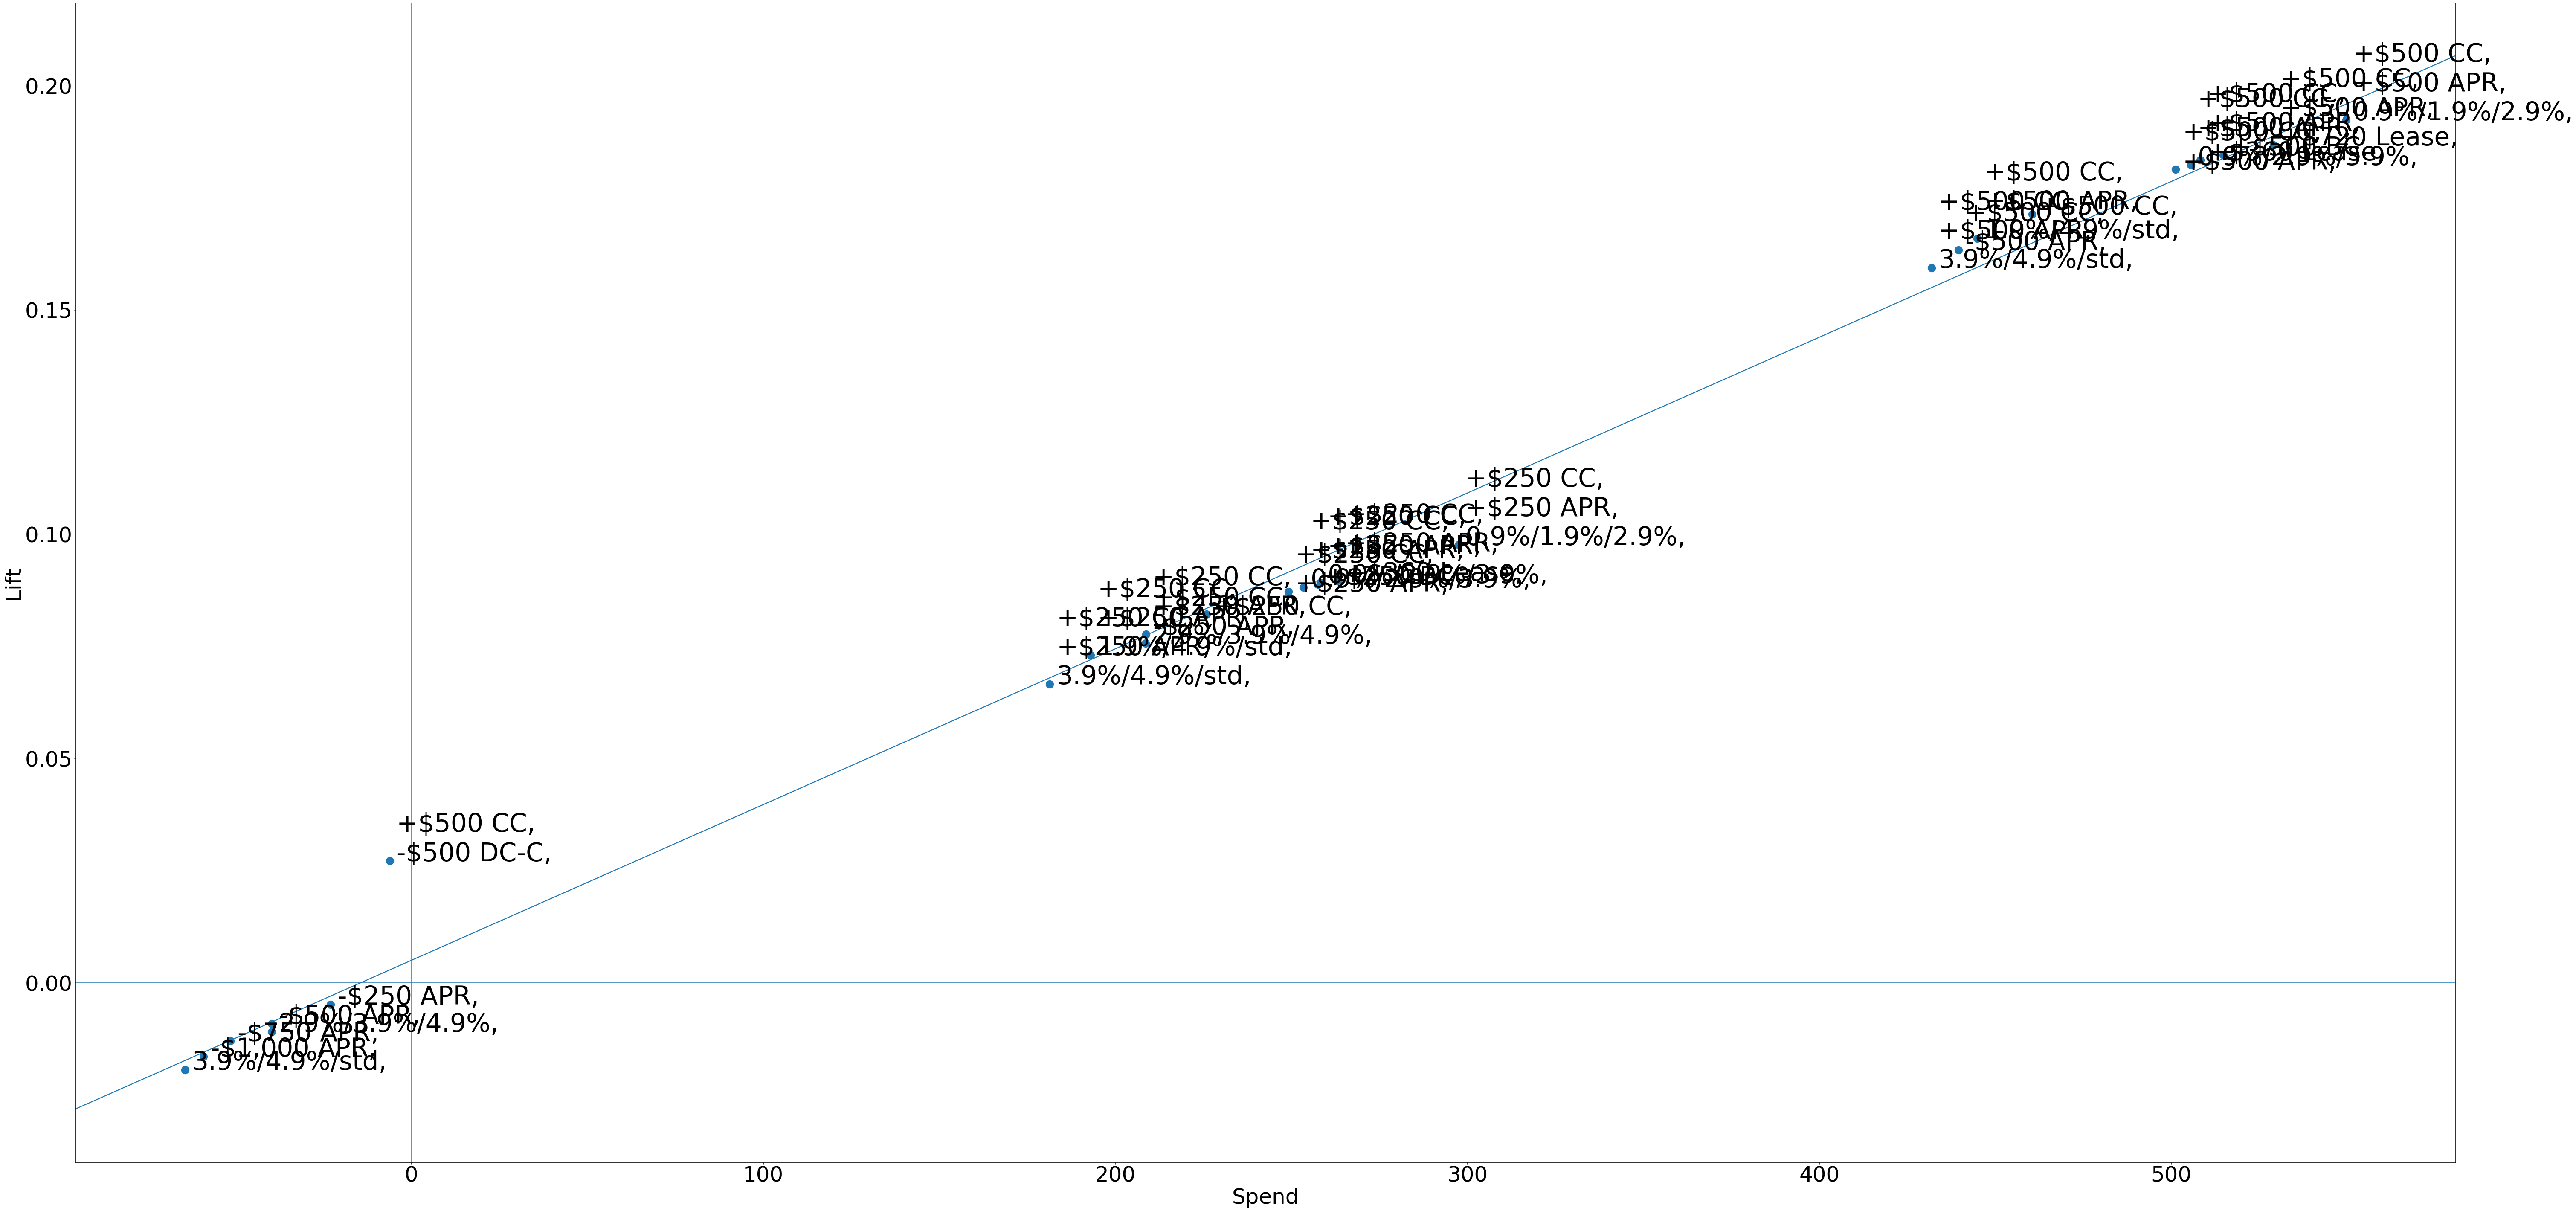

In [10]:
# Plot efficiency frontier above best fit line
fig, ax = plt.subplots()
p1 = sns.scatterplot(x=eff_frontier['spend_delta'], y=eff_frontier['lift_delta'], s=400)
p2 = sns.regplot(x=eff_frontier['spend_delta'], y=eff_frontier['lift_delta'], ci=0)

ax.axhline(y=0)
ax.axvline(x=0)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('Spend', fontsize=50)
plt.ylabel('Lift', fontsize=50)
plt.rcParams["figure.figsize"] = (100,50)

# Label data points
for row in range(0, eff_frontier.shape[0]):
    p1.text(eff_frontier['spend_delta'].iloc[row]+2, eff_frontier['lift_delta'].iloc[row], eff_frontier['scenarios'].iloc[row], size=60)
    
plt.show()

In [11]:
# Remove single lever moves (add user option in later)
eff_frontier['lift/spend'] = eff_frontier['lift_delta'] / eff_frontier['spend_delta']
eff_frontier = eff_frontier[eff_frontier['no_of_moves'] > 1].sort_values('spend_delta')

eff_frontier

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,scenarios,cash_delta,finance_delta,lease_delta,spend_delta,lift_delta,no_of_moves,row_no,y_line,lift/spend
142,"+$500 CC, \n-$500 DC-C,",85.0,-0.000775,0.0,-6.134065,0.027164,2,28,0.000299,-0.004428
75,"+$250 CC, \n+$250 APR, \n3.9%/4.9%/std,",250.0,-242.420575,0.0,181.339491,0.066600,3,15,0.066025,0.000367
147,"+$250 CC, \n+$250 APR, \n1.9%/4.9%/std,",250.0,274.550677,0.0,192.969960,0.073018,3,29,0.070102,0.000378
67,"+$250 CC, \n+$250 APR, \n2.9%/3.9%/4.9%,",250.0,-91.585909,0.0,208.644273,0.075655,3,14,0.075598,0.000363
111,"+$250 CC, \n-$250 APR,",250.0,-250.006851,0.0,208.757103,0.077657,2,21,0.075637,0.000372
43,"+$250 CC, \n+$250 APR,",250.0,250.000648,0.0,249.183002,0.087208,2,8,0.089810,0.000350
133,"+$250 CC, \n+$250 APR, \n0.9%/2.9%/3.9%,",250.0,294.560543,0.0,253.469452,0.088163,3,25,0.091313,0.000348
137,"+$250 CC, \n+$250 APR, \n0.0%/2.9%/3.9%,",250.0,346.794928,0.0,258.306635,0.089158,3,27,0.093009,0.000345
99,"+$250 CC, \n+$250 APR, \n+$360 Lease,",250.0,249.998258,360.0,263.258118,0.089645,3,17,0.094745,0.000341
59,"+$250 CC, \n+$250 APR, \n0.9%/1.9%/2.9%,",250.0,600.537028,0.0,297.483935,0.097624,3,12,0.106744,0.000328


In [12]:
# Reduce APR moves with std
reg_ex = "std"
reg_ex_filter = eff_frontier['scenarios'].str.contains(reg_ex)
eff_frontier = eff_frontier[~reg_ex_filter]

eff_frontier

,scenarios,cash_delta,finance_delta,lease_delta,spend_delta,lift_delta,no_of_moves,row_no,y_line,lift/spend
142,"+$500 CC, \n-$500 DC-C,",85.0,-0.000775,0.0,-6.134065,0.027164,2,28,0.000299,-0.004428
67,"+$250 CC, \n+$250 APR, \n2.9%/3.9%/4.9%,",250.0,-91.585909,0.0,208.644273,0.075655,3,14,0.075598,0.000363
111,"+$250 CC, \n-$250 APR,",250.0,-250.006851,0.0,208.757103,0.077657,2,21,0.075637,0.000372
43,"+$250 CC, \n+$250 APR,",250.0,250.000648,0.0,249.183002,0.087208,2,8,0.089810,0.000350
133,"+$250 CC, \n+$250 APR, \n0.9%/2.9%/3.9%,",250.0,294.560543,0.0,253.469452,0.088163,3,25,0.091313,0.000348
137,"+$250 CC, \n+$250 APR, \n0.0%/2.9%/3.9%,",250.0,346.794928,0.0,258.306635,0.089158,3,27,0.093009,0.000345
99,"+$250 CC, \n+$250 APR, \n+$360 Lease,",250.0,249.998258,360.0,263.258118,0.089645,3,17,0.094745,0.000341
59,"+$250 CC, \n+$250 APR, \n0.9%/1.9%/2.9%,",250.0,600.537028,0.0,297.483935,0.097624,3,12,0.106744,0.000328
112,"+$500 CC, \n-$500 APR,",500.0,-500.016797,0.0,439.509280,0.163375,2,22,0.156536,0.000372
44,"+$500 CC, \n+$500 APR,",500.0,500.001092,0.0,501.226678,0.181333,2,9,0.178173,0.000362


In [13]:
# Remove +CC and -APR moves
reg_ex = "APR"
reg_ex_filter = eff_frontier['scenarios'].str.contains(reg_ex)
eff_frontier['cash_finance_sum'] = round(eff_frontier['cash_delta']/50.0)*50 + round(eff_frontier['finance_delta']/50.0)*50
cash_finance_sum_filter = eff_frontier['cash_finance_sum'] == 0

eff_frontier = eff_frontier[~(reg_ex_filter & cash_finance_sum_filter)]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


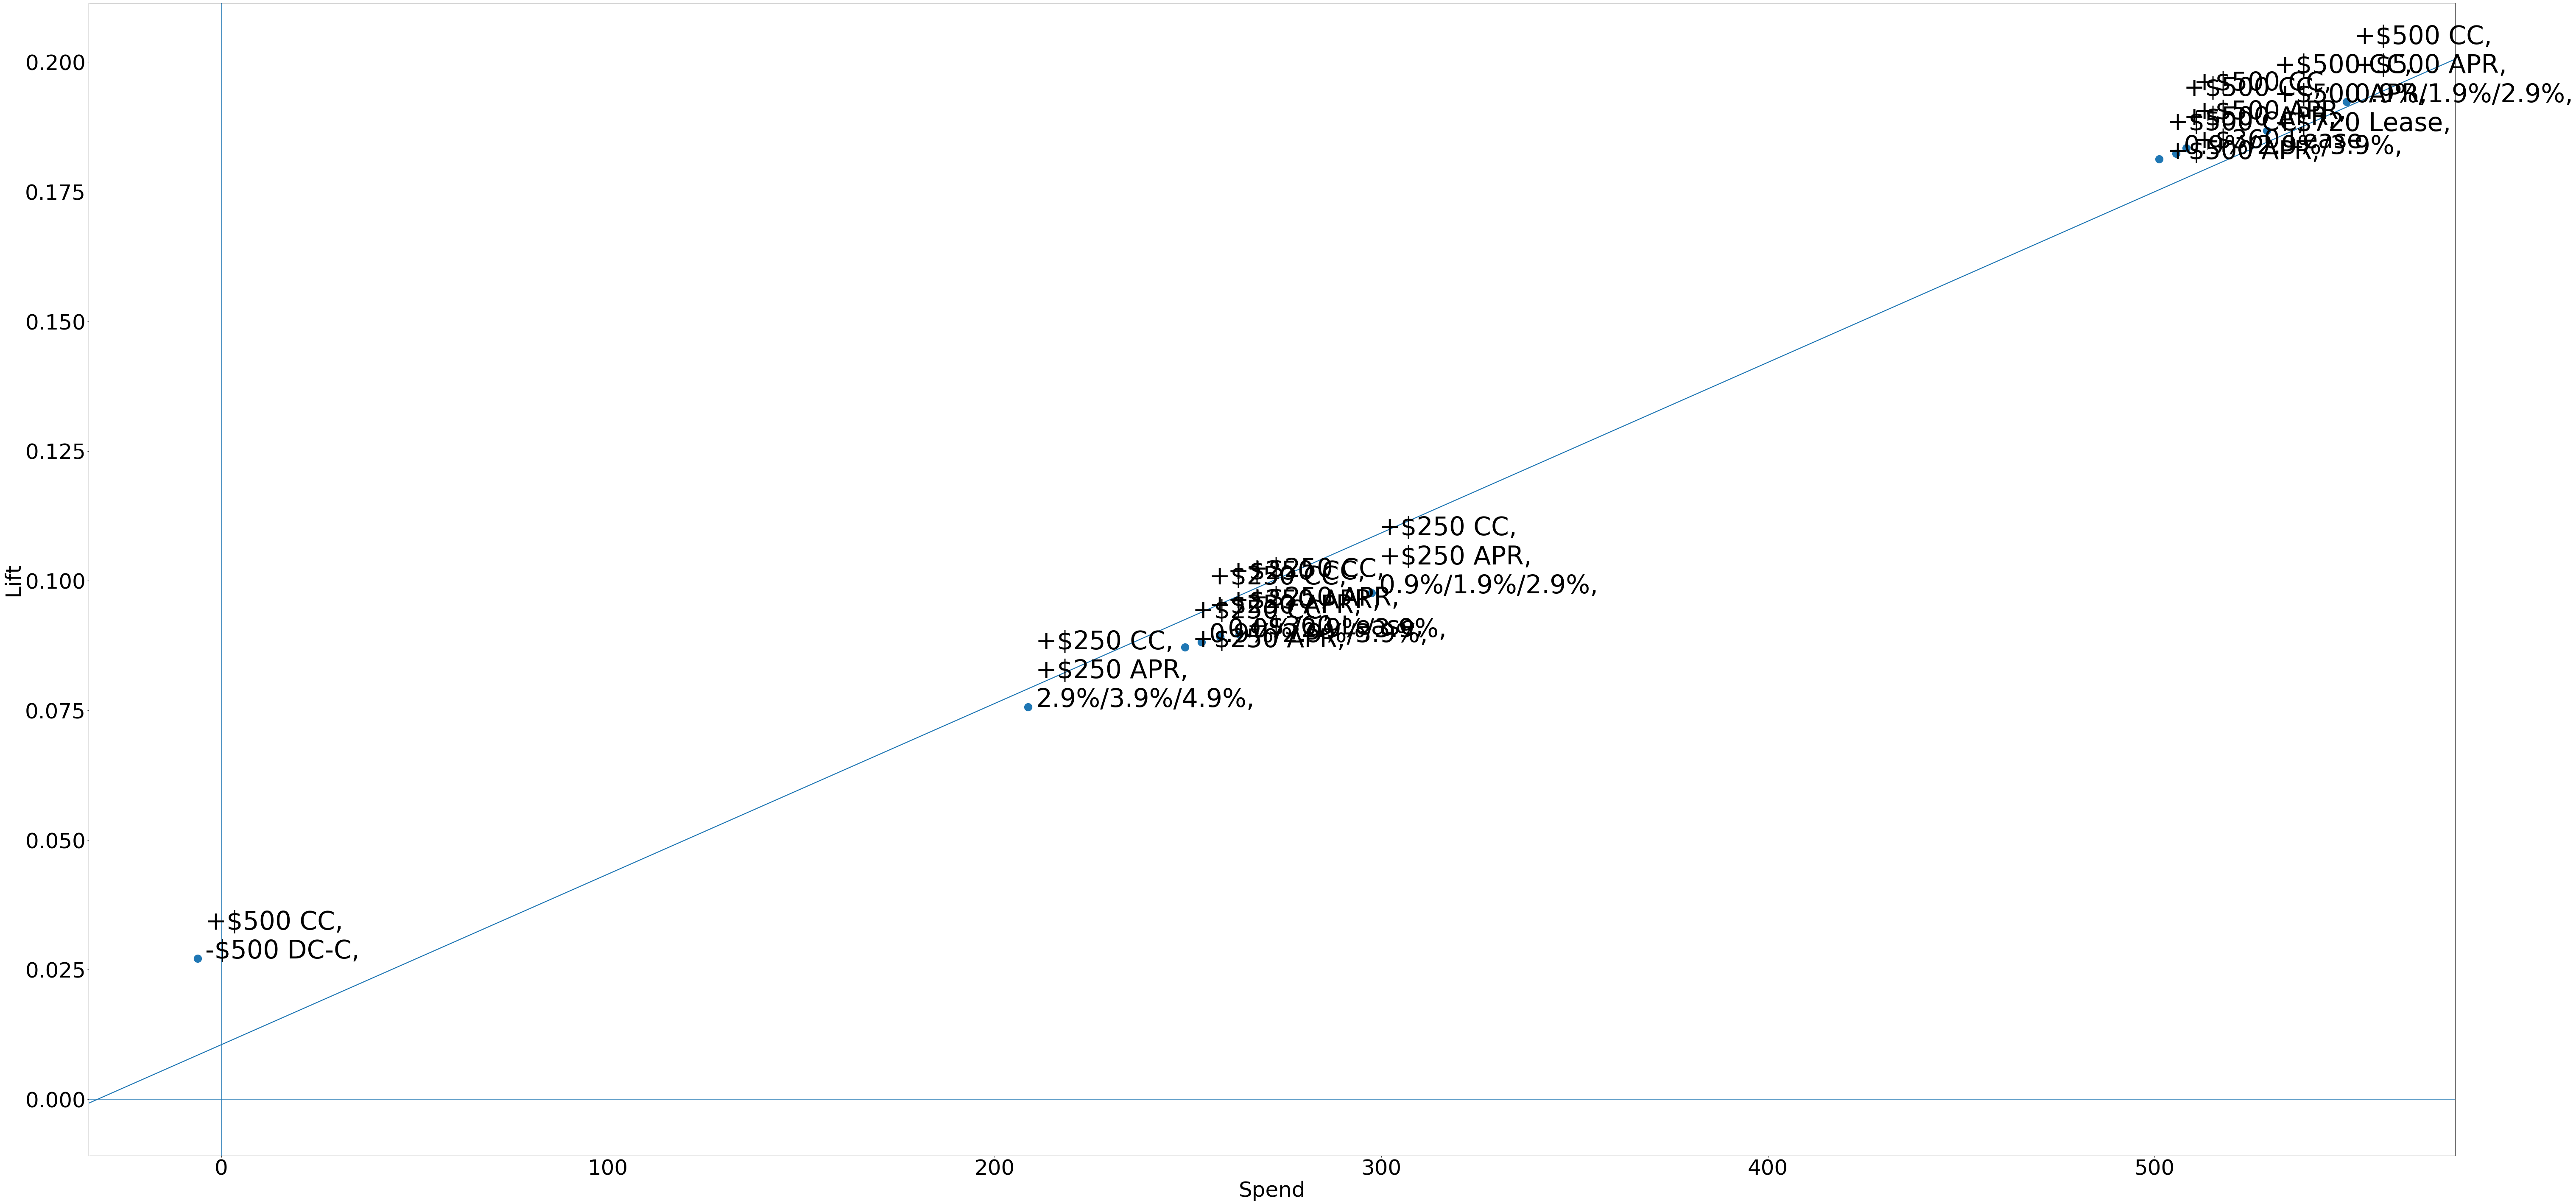

In [14]:
# Plot remaining scenarios above best fit line
fig, ax = plt.subplots()
p1 = sns.scatterplot(x=eff_frontier['spend_delta'], y=eff_frontier['lift_delta'], s=400)
p2 = sns.regplot(x=eff_frontier['spend_delta'], y=eff_frontier['lift_delta'], ci=0)

ax.axhline(y=0)
ax.axvline(x=0)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel('Spend', fontsize=50)
plt.ylabel('Lift', fontsize=50)
plt.rcParams["figure.figsize"] = (100,50)

# Label data points
for row in range(0, eff_frontier.shape[0]):
    p1.text(eff_frontier['spend_delta'].iloc[row]+2, eff_frontier['lift_delta'].iloc[row], eff_frontier['scenarios'].iloc[row], size=60)
      
plt.show()

In [15]:
eff_frontier

,scenarios,cash_delta,finance_delta,lease_delta,spend_delta,lift_delta,no_of_moves,row_no,y_line,lift/spend,cash_finance_sum
142,"+$500 CC, \n-$500 DC-C,",85.0,-0.000775,0.0,-6.134065,0.027164,2,28,0.000299,-0.004428,100.0
67,"+$250 CC, \n+$250 APR, \n2.9%/3.9%/4.9%,",250.0,-91.585909,0.0,208.644273,0.075655,3,14,0.075598,0.000363,150.0
43,"+$250 CC, \n+$250 APR,",250.0,250.000648,0.0,249.183002,0.087208,2,8,0.089810,0.000350,500.0
133,"+$250 CC, \n+$250 APR, \n0.9%/2.9%/3.9%,",250.0,294.560543,0.0,253.469452,0.088163,3,25,0.091313,0.000348,550.0
137,"+$250 CC, \n+$250 APR, \n0.0%/2.9%/3.9%,",250.0,346.794928,0.0,258.306635,0.089158,3,27,0.093009,0.000345,600.0
99,"+$250 CC, \n+$250 APR, \n+$360 Lease,",250.0,249.998258,360.0,263.258118,0.089645,3,17,0.094745,0.000341,500.0
59,"+$250 CC, \n+$250 APR, \n0.9%/1.9%/2.9%,",250.0,600.537028,0.0,297.483935,0.097624,3,12,0.106744,0.000328,850.0
44,"+$500 CC, \n+$500 APR,",500.0,500.001092,0.0,501.226678,0.181333,2,9,0.178173,0.000362,1000.0
134,"+$500 CC, \n+$500 APR, \n0.9%/2.9%/3.9%,",500.0,544.573675,0.0,505.529189,0.182334,3,26,0.179682,0.000361,1050.0
100,"+$500 CC, \n+$500 APR, \n+$360 Lease,",500.0,499.999153,360.0,508.179164,0.183427,3,18,0.180611,0.000361,1000.0
